In [57]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [58]:
# Import Dataset
dataset = pd.read_csv('breast-cancer.csv')

In [59]:
# Melihat 5 Data Teratas
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [60]:
# Mengetahui Volume dari dataset
print('Number row: ',dataset.shape[0])
print('Number collumns: ',dataset.shape[1])

# Melalui hasil yang didapatkan, terdapat total jumlah 1776 data

Number row:  569
Number collumns:  32


In [61]:
# Melihat tipe data dari setiap columns
dataset.info()

# Terdapat 29 kolom yang bertipe float , 1 tipe data string atau object serta 1 kolom bertipe integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [62]:
# Mengetahui total nilai unik dari setiap column
dataset.nunique()

# Didapati seluruh kolom memiliki nilai unik lebih dari 1 buah

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [63]:
#Mengetahui apakah ada kolum yang memiliki nilai kosong 
dataset.isna().any()

# Tidak ada kolom yang meimiliki nilai klosong atau null

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [64]:
# Mengetahui apakah terdapat nilai duplikat dalam dataset
dataset.duplicated().any()

# Tidak ada kolom atau row yang bersifat duplikat dalam dataset

False

In [65]:
# Deskripsi matematis dataset
dataset.drop(['id'], axis = 1, inplace=True)
dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [66]:
# Menghitung total jumlah dataset untuk M(Maligant) dan B(Benign)
dataset.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7ff3661eac50>,
 [Text(-0.4286546999573329, 1.0130425204326268, 'B'),
  Text(0.428654605109445, -1.013042560566172, 'M')],
 [Text(-0.23381165452218156, 0.5525686475087055, '62.7%'),
  Text(0.23381160278696997, -0.55256866939973, '37.3%')])

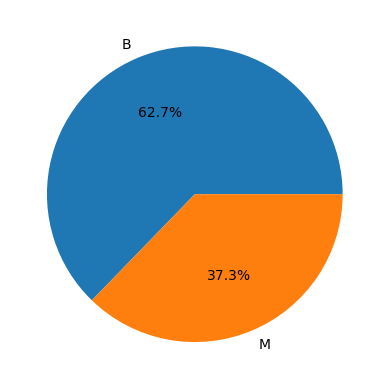

In [67]:
# Persentase Perbandigan
diagnosis_counts = dataset['diagnosis'].value_counts()
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%')

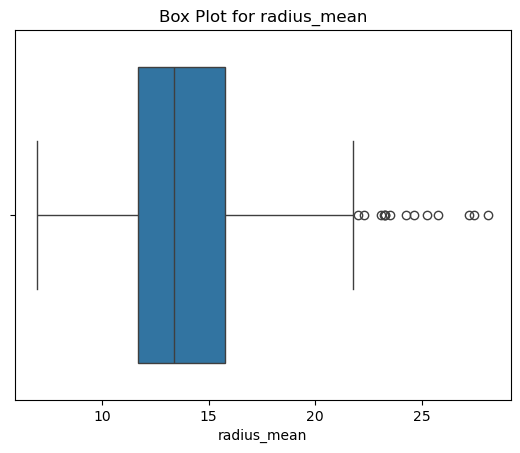

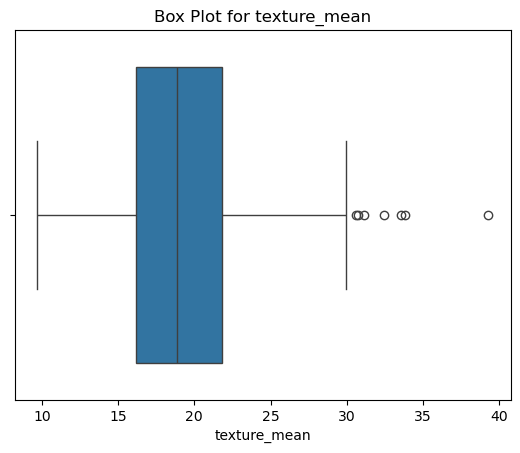

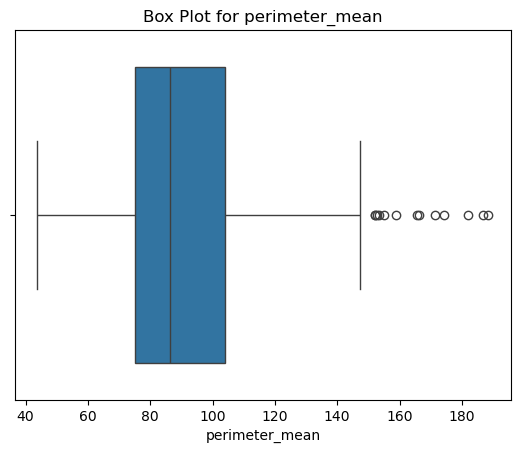

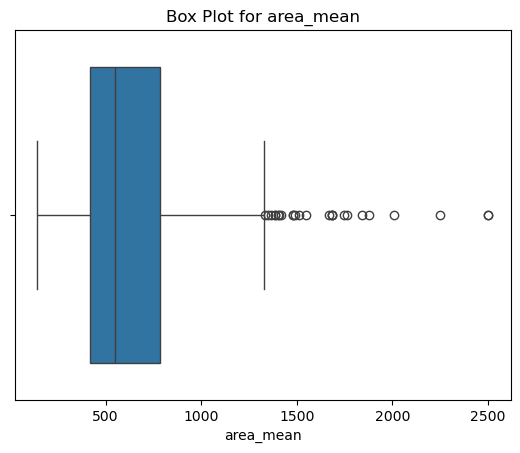

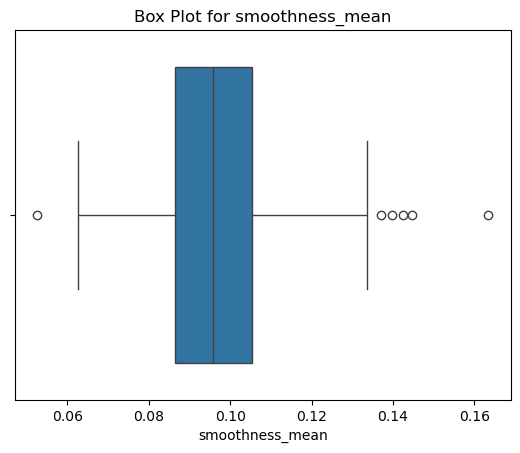

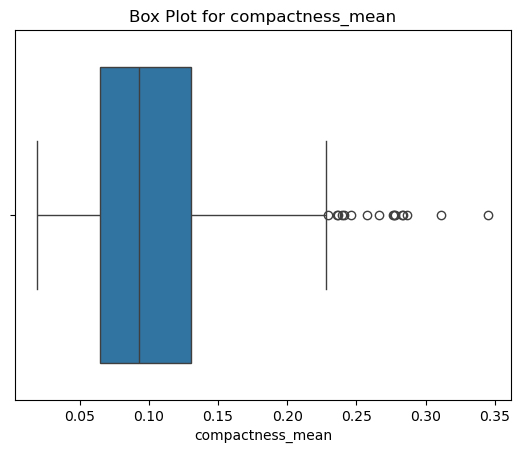

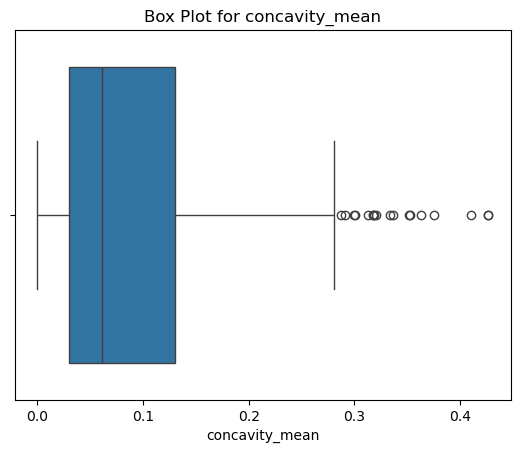

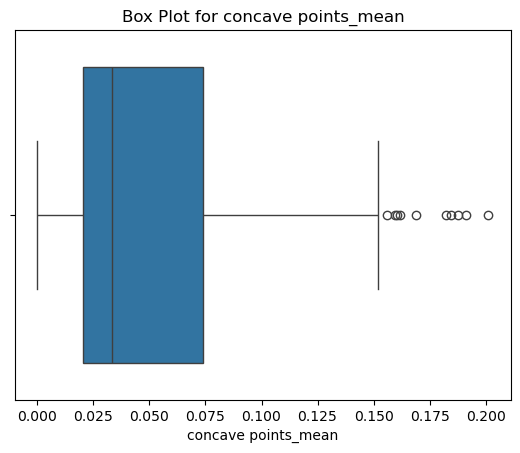

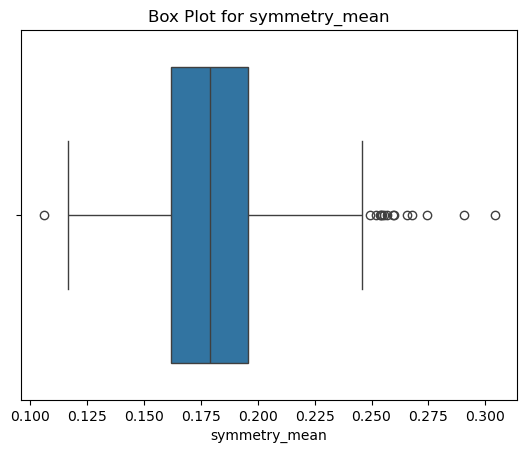

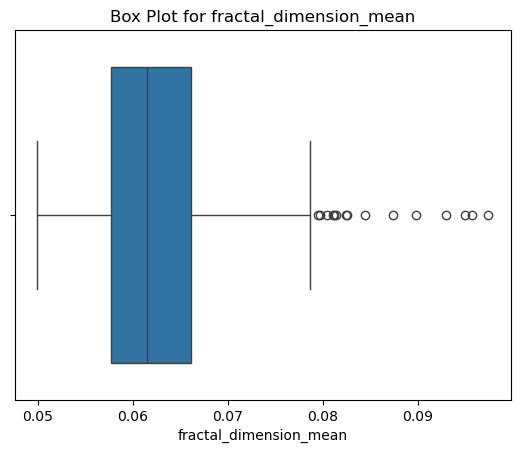

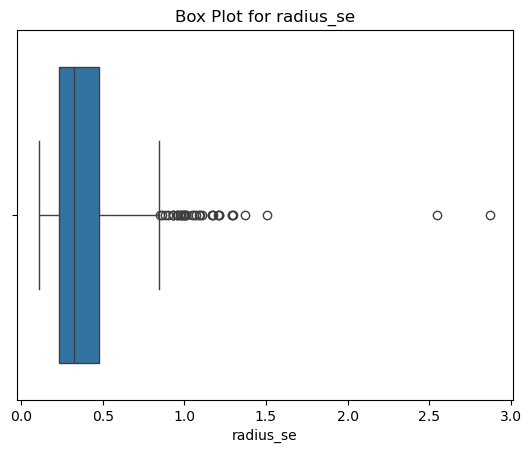

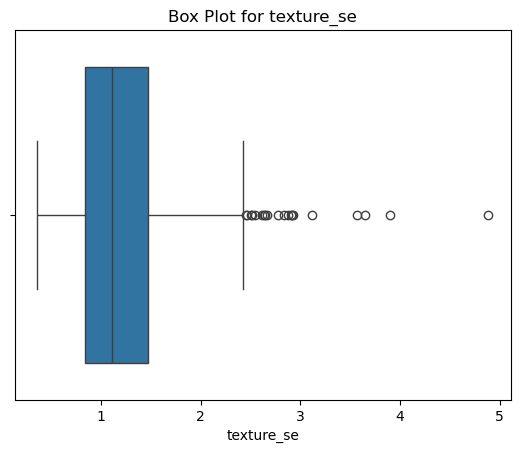

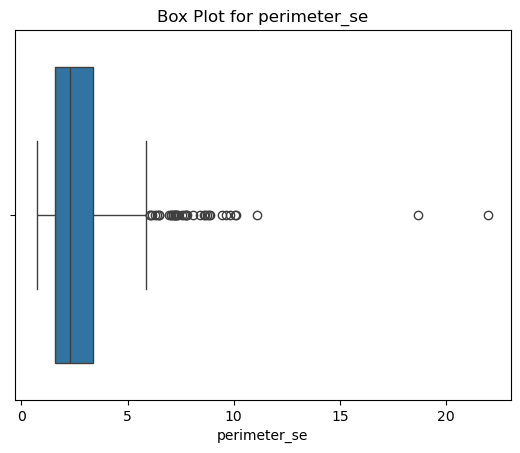

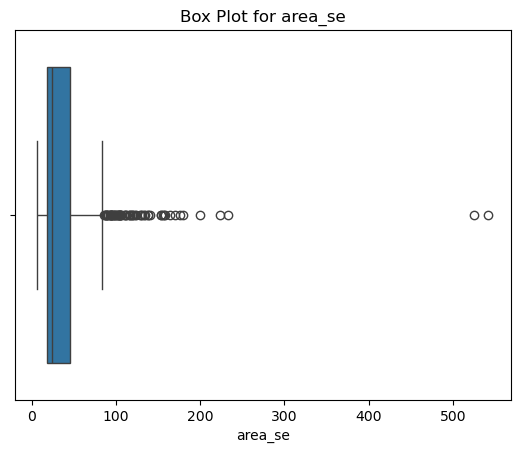

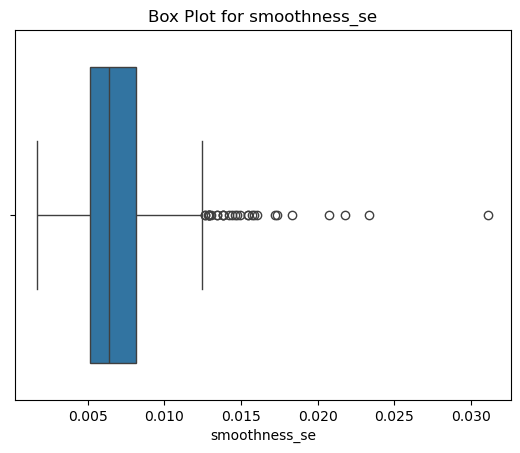

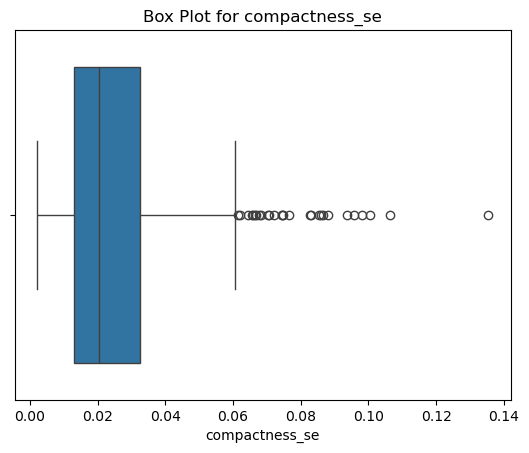

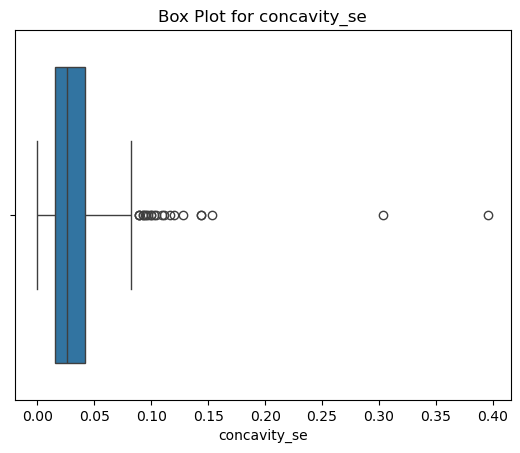

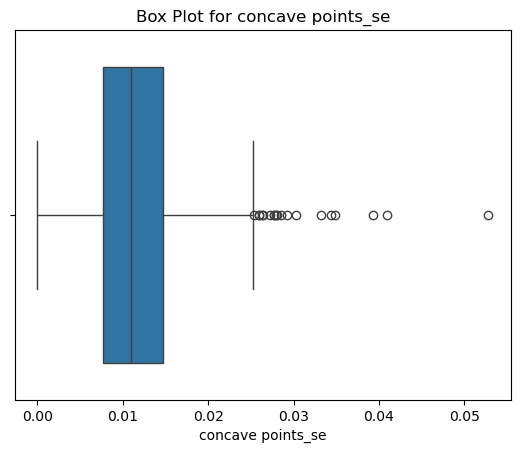

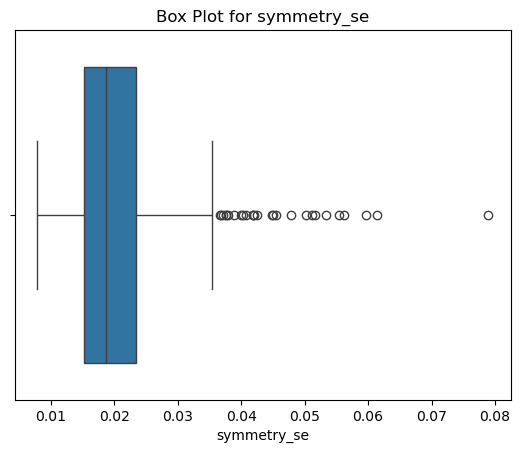

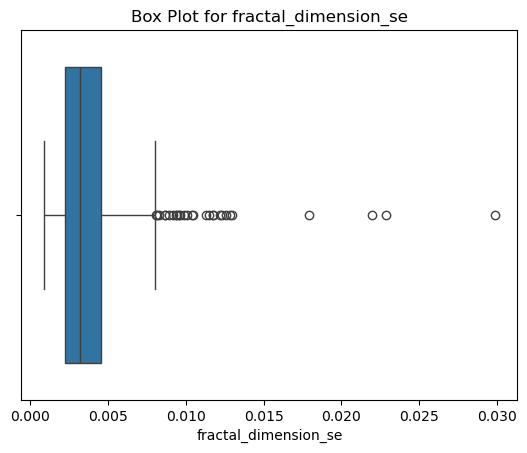

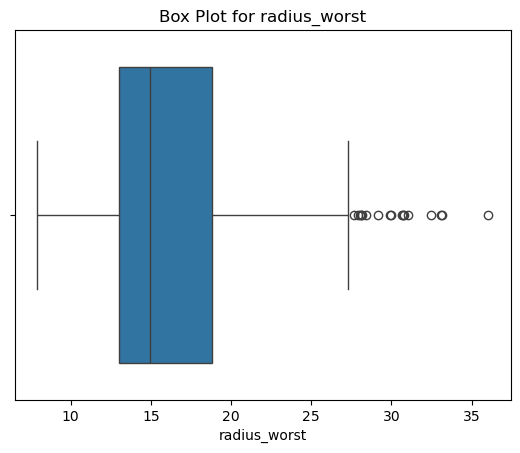

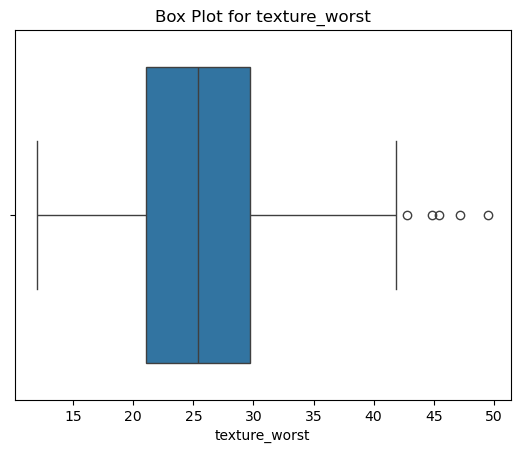

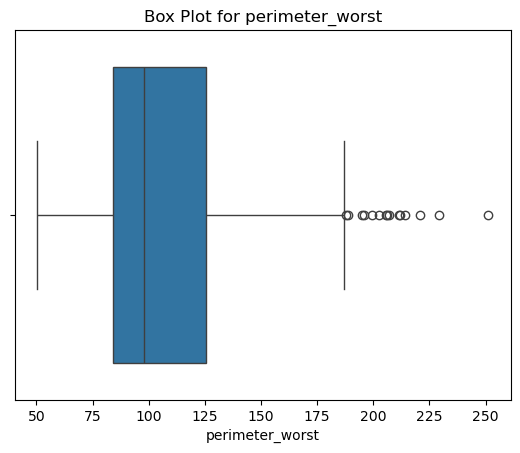

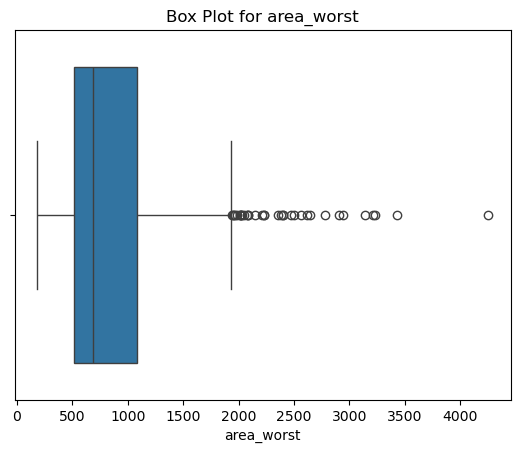

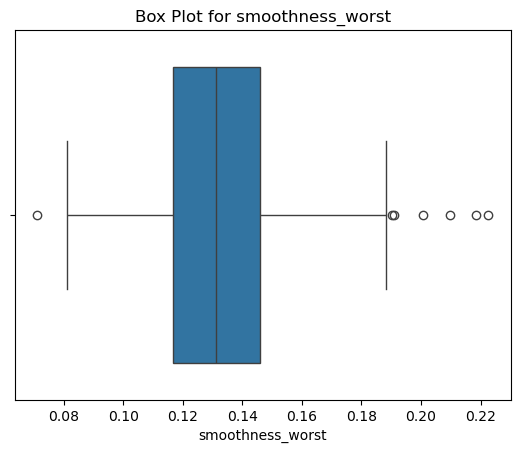

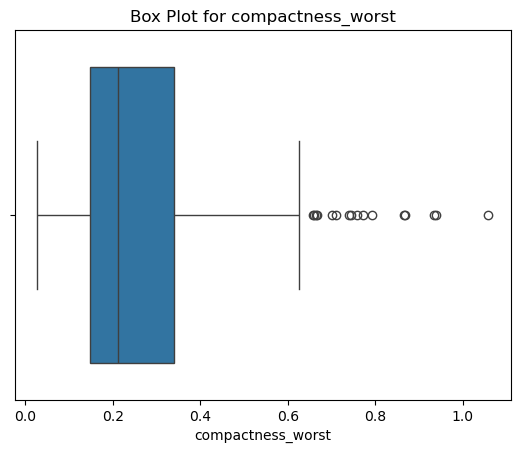

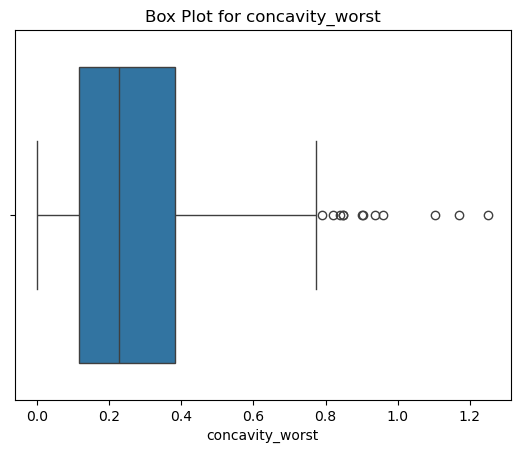

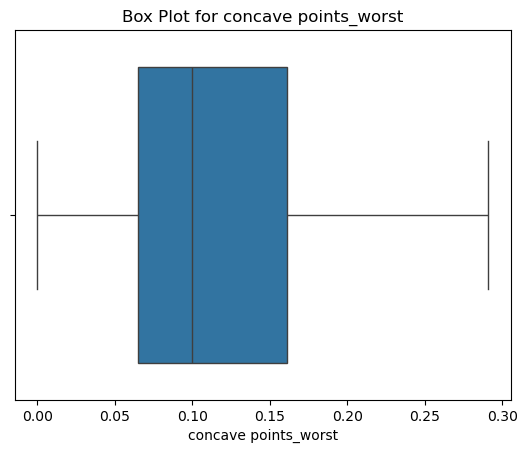

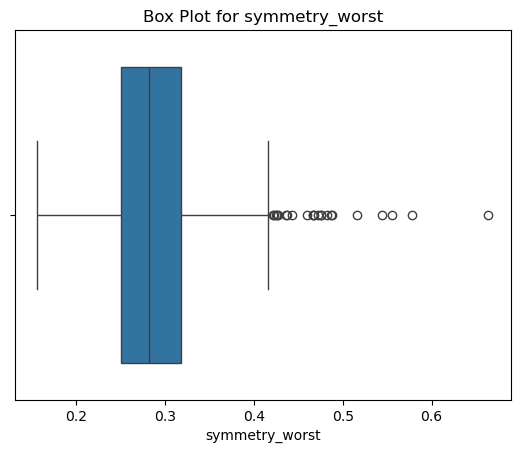

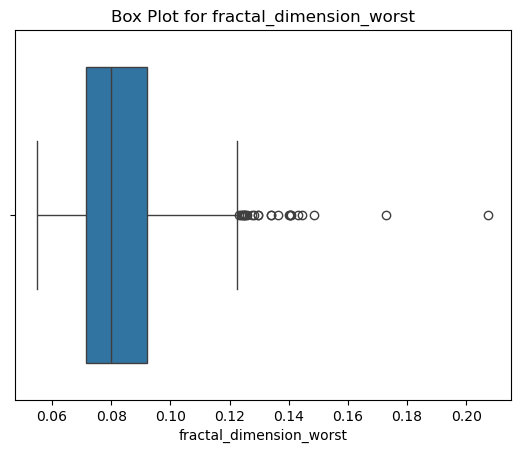

In [68]:
# Mencari nilai outlier dalam dataset
for column in dataset.columns:
    if column != 'diagnosis':
        sns.boxplot(x=dataset[column])
        plt.title(f"Box Plot for {column}")
        plt.show()

# Memalalui visualisasi box plot untuk seluruh kolom, terkecuali diagnosis dan id, ditemukan hampir seluruhnya memilik nilai outlier sehingga diperlukan penghapusan outlier pada saat preprocessing

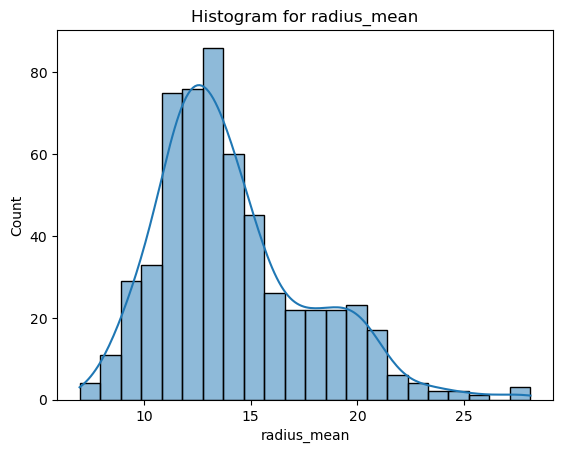

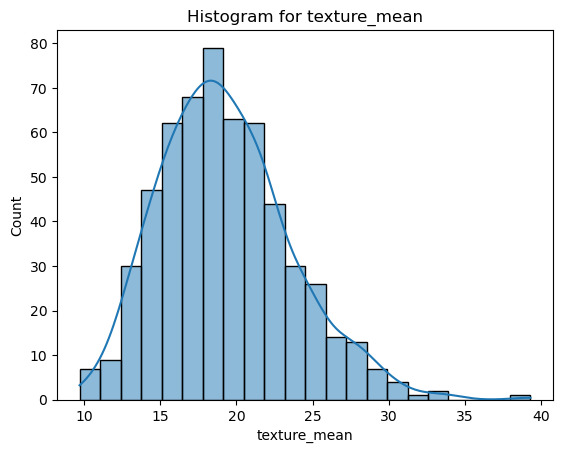

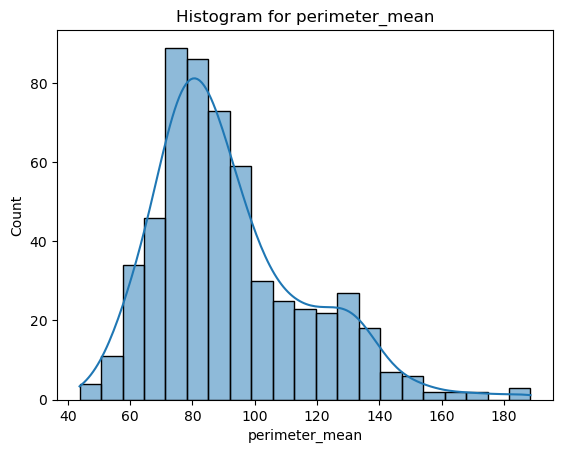

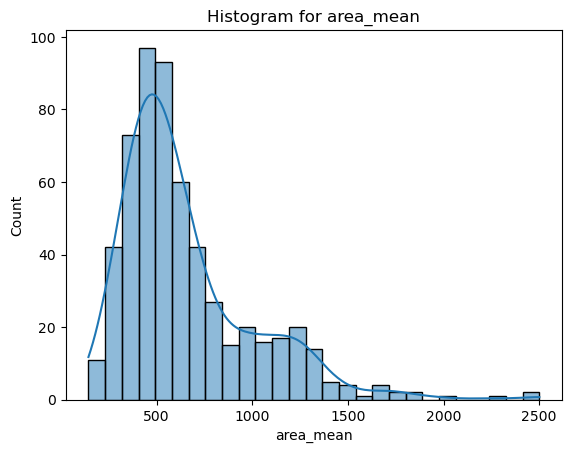

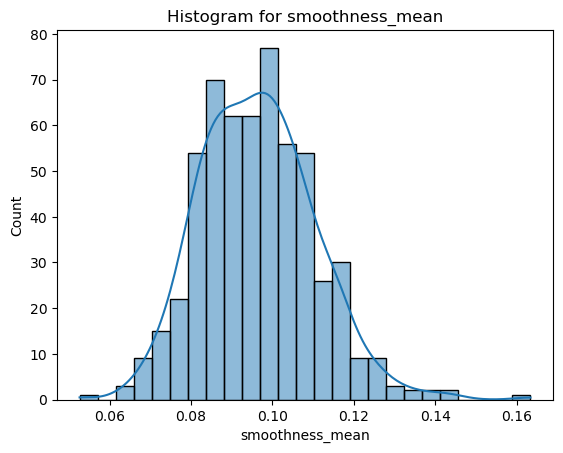

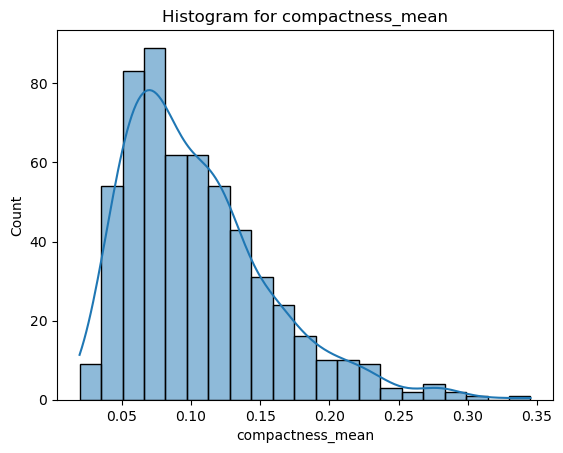

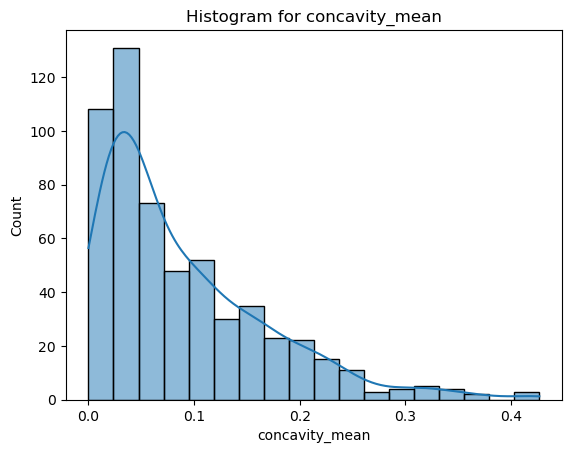

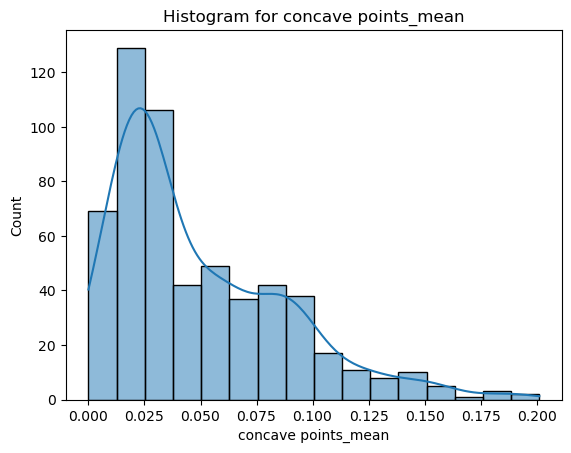

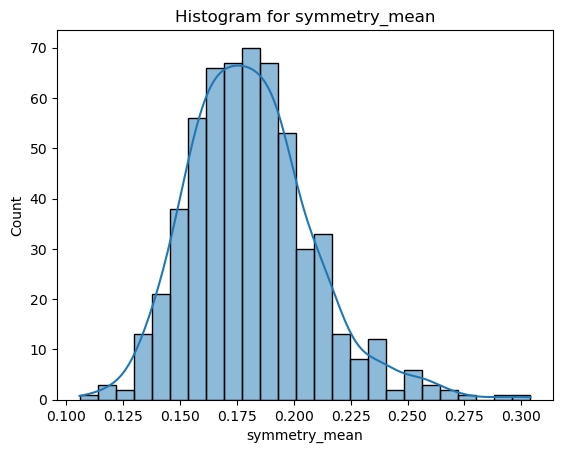

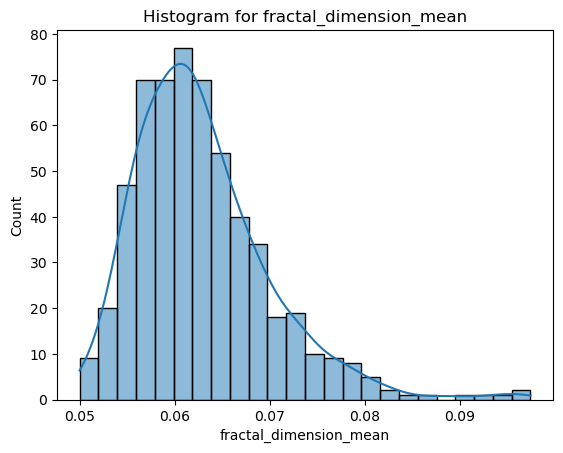

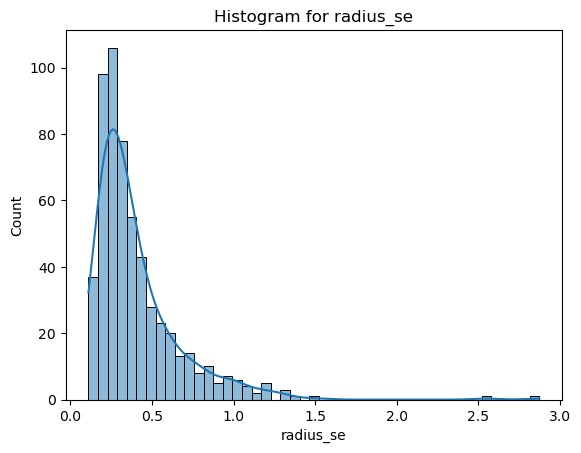

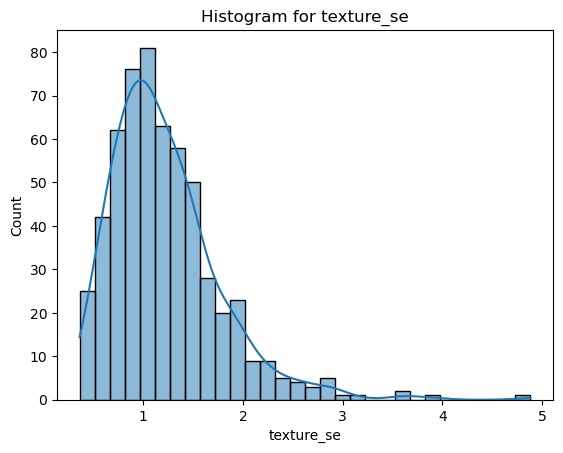

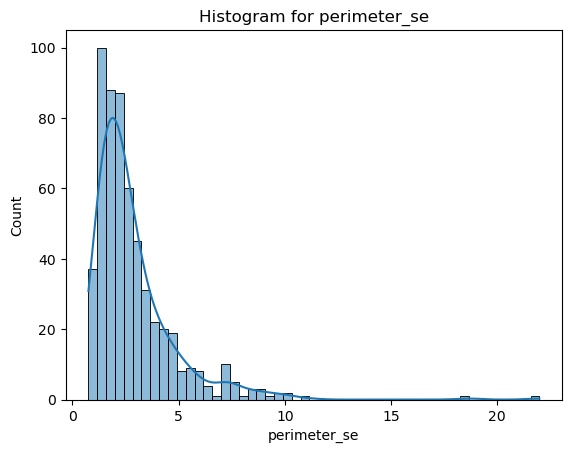

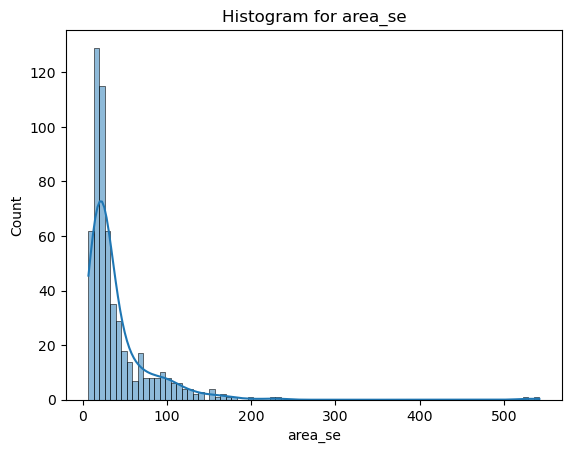

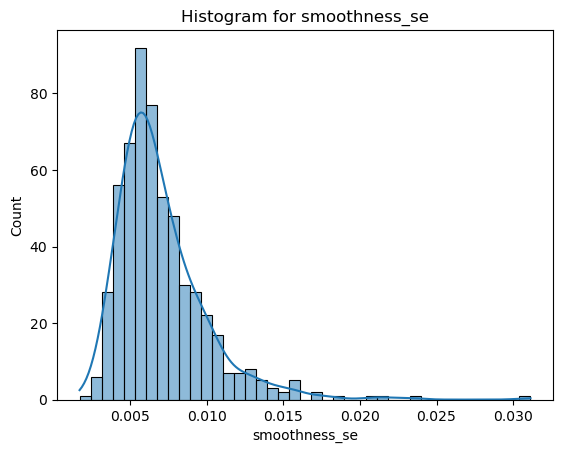

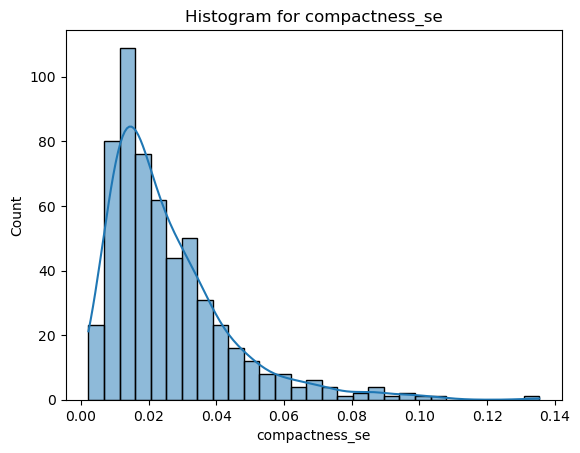

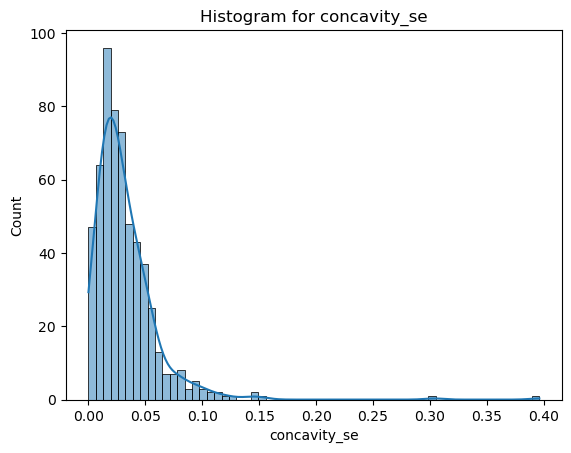

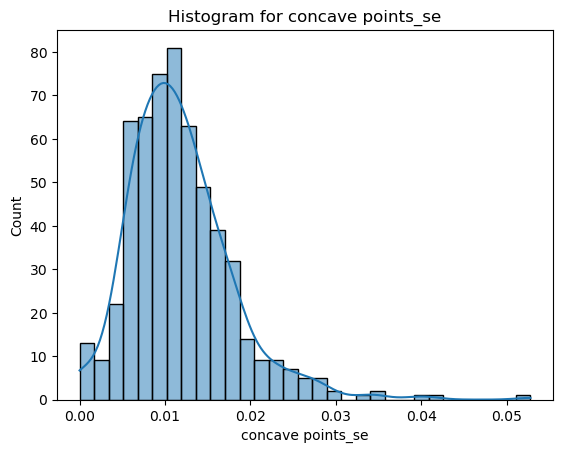

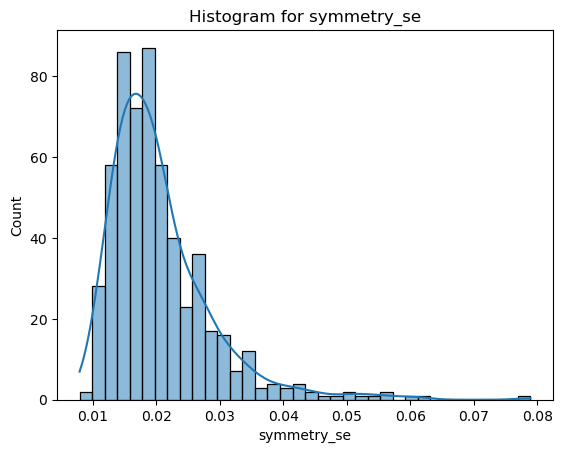

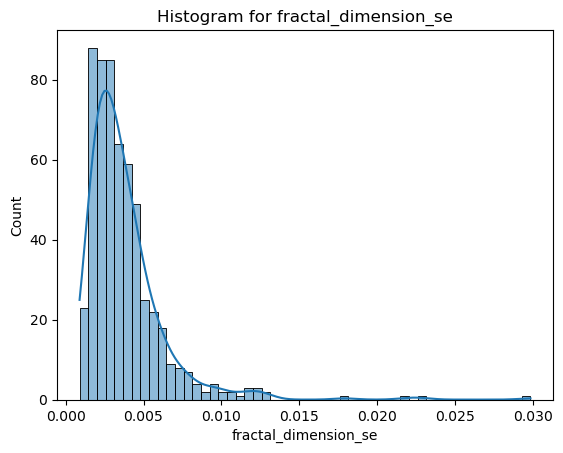

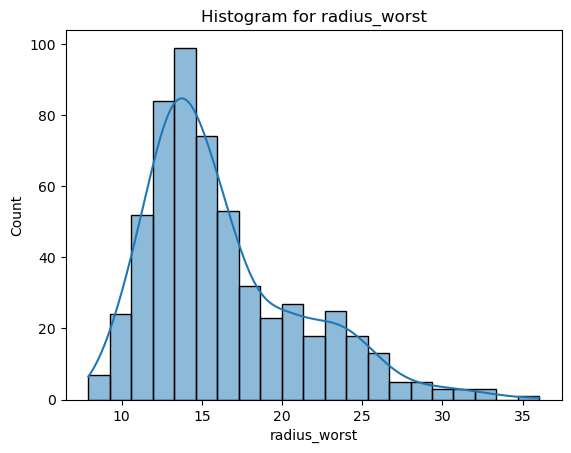

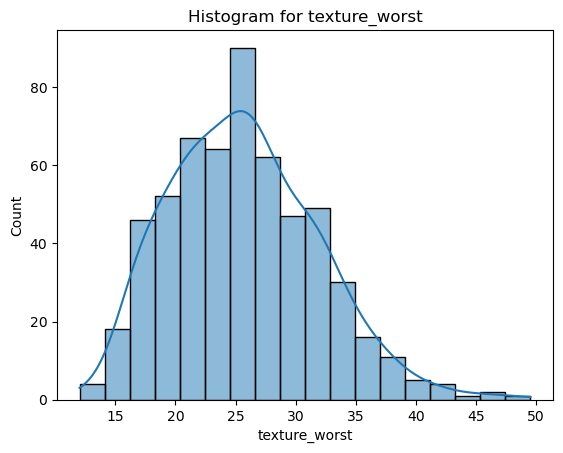

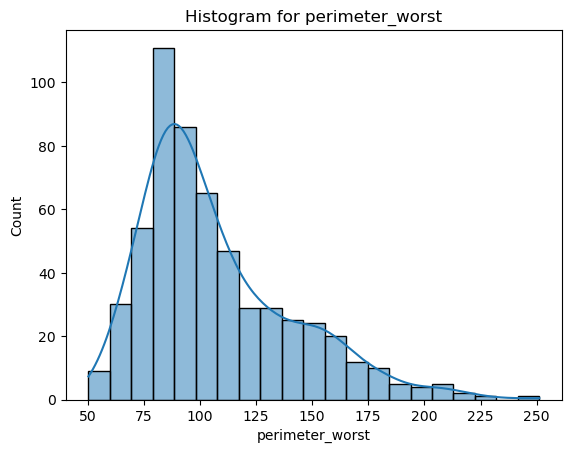

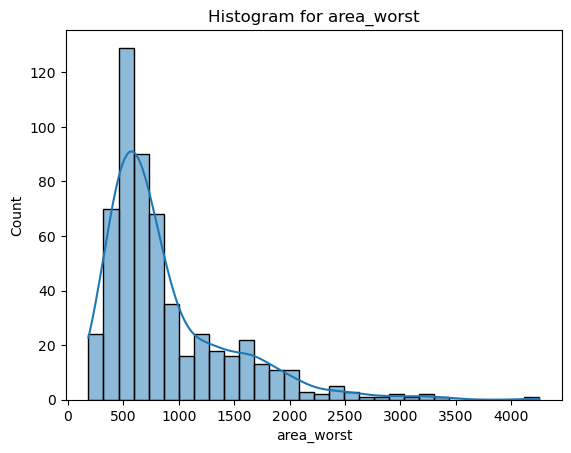

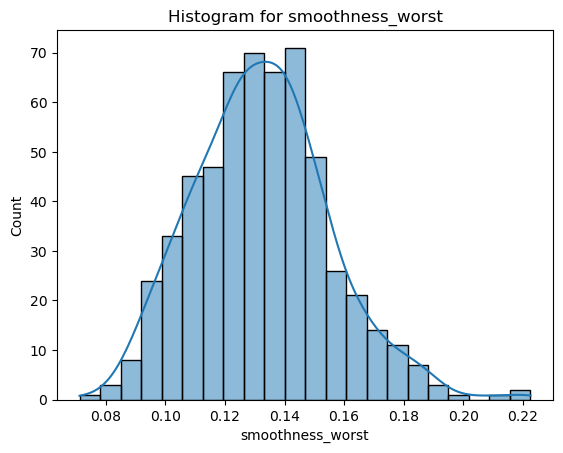

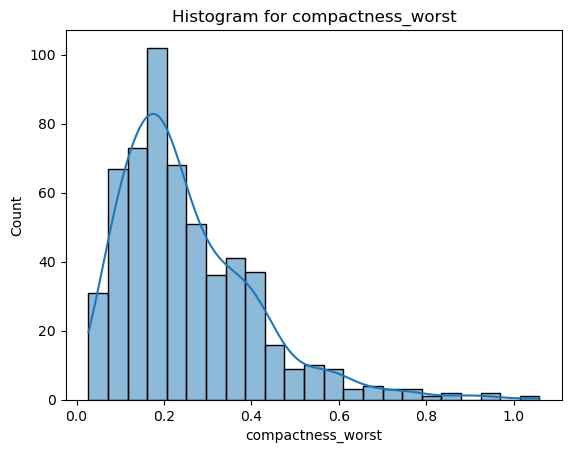

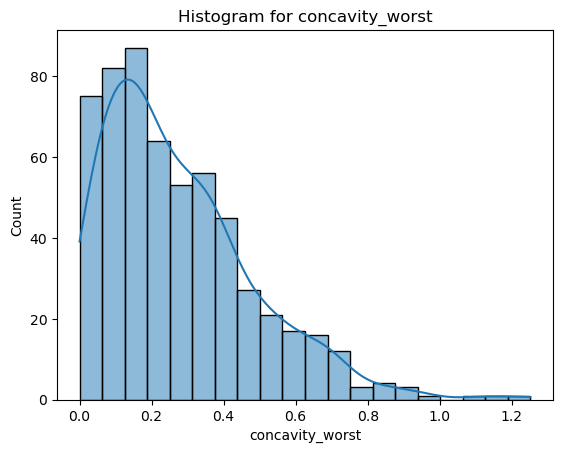

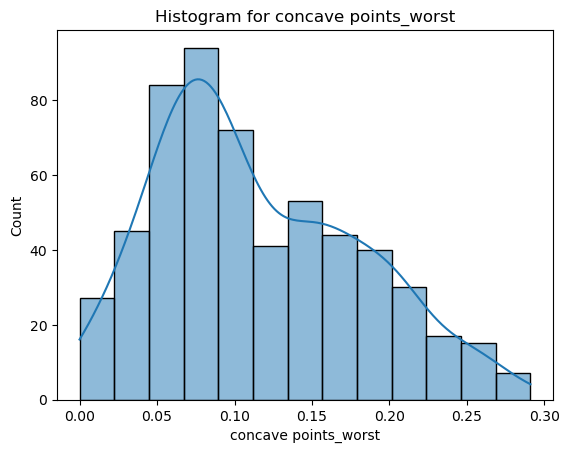

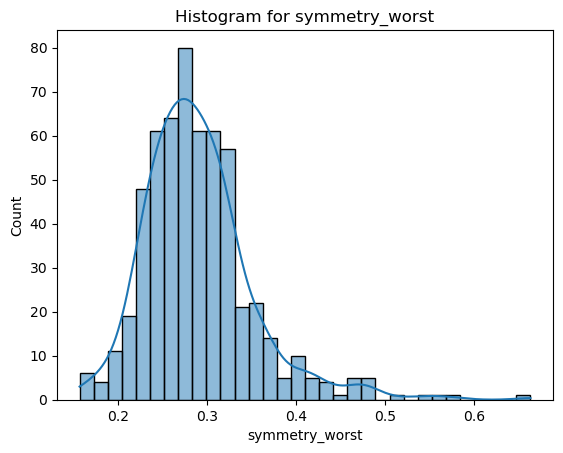

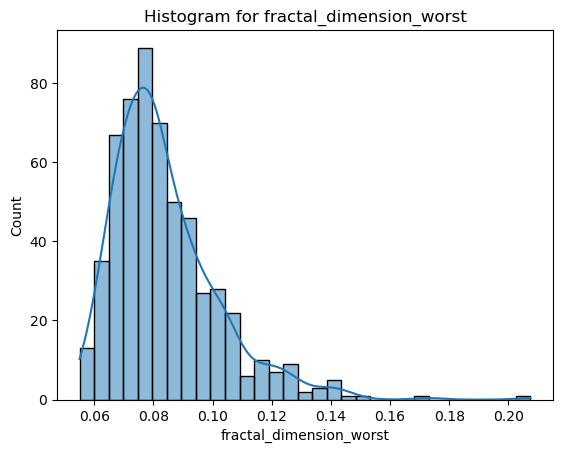

In [69]:
# Distribusi data dari setiap kolom
for column in dataset.columns:
    if column != 'diagnosis':
        sns.histplot(data=dataset, x=column, kde=True) 
        plt.title(f"Histogram for {column}")
        plt.show()

In [81]:
# Perhitungan korelasi terdekat terhadap target dengan nilai pengaruh yang tinggi
X = dataset.drop('diagnosis', axis=1)
y = dataset['diagnosis']
rf = RandomForestClassifier()
rf.fit(X, y)
feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df)

# Melalui pemeringkatan pengaruh fitur pada target diagnosis, kita bisa mengambil kesimpulan bahwa radius_worst, concave points_worst,perimeter_worst,concave points_mean,area_worst

                    Feature  Importance
20             radius_worst    0.146498
27     concave points_worst    0.124878
22          perimeter_worst    0.114086
7       concave points_mean    0.102941
23               area_worst    0.078036
6            concavity_mean    0.068522
3                 area_mean    0.047613
0               radius_mean    0.045858
2            perimeter_mean    0.045630
13                  area_se    0.034562
26          concavity_worst    0.028986
10                radius_se    0.022106
1              texture_mean    0.015862
25        compactness_worst    0.014491
24         smoothness_worst    0.013902
21            texture_worst    0.013194
28           symmetry_worst    0.011191
16             concavity_se    0.009421
4           smoothness_mean    0.008993
5          compactness_mean    0.006933
14            smoothness_se    0.006325
29  fractal_dimension_worst    0.006110
12             perimeter_se    0.005642
19     fractal_dimension_se    0.005224
